In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Medical Price dataset
medical_data = pd.read_csv('Medical Price Dataset.csv')

In [6]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# Preprocess the data
medical_data.dropna(inplace=True)
X = medical_data['age'].values
y = medical_data['charges'].values

In [8]:
# Normalize the features
X_normalized = (X - np.mean(X)) / np.std(X)

In [9]:
# Add a column of ones for the intercept term
X_normalized_with_intercept = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [10]:
# Define the Linear Regression function
def linear_regression(X, y):
    X_transpose = X.T
    X_transpose_X_inv = np.linalg.inv(np.dot(X_transpose, X))
    X_transpose_y = np.dot(X_transpose, y)
    
    theta = np.dot(X_transpose_X_inv, X_transpose_y)
    return theta

In [11]:
# Perform Linear Regression
theta = linear_regression(X_normalized_with_intercept, y)

In [12]:
# Print the coefficients
intercept = theta[0]
slope = theta[1]
print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 13270.422265141257
Slope: 3619.639191933976


In [14]:
# Calculate the predicted values
y_predicted = intercept + slope * X_normalized
y_predicted

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

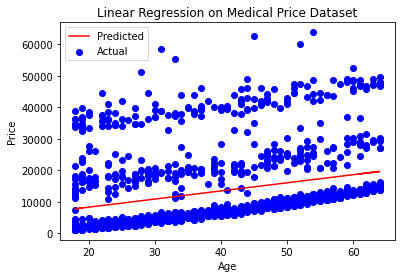

In [15]:
# Visualize the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_predicted, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Linear Regression on Medical Price Dataset')
plt.legend()
plt.show()